In [1]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
import os
import numpy as np
import netCDF4 as nc
import xarray as xr
import datatree as dt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from sithom.plot import plot_defaults, label_subplots, lim
from tcpips.constants import DATA_PATH, FIGURE_PATH
from adforce.mesh import xr_loader

plot_defaults()

In [5]:
ds = xr.open_dataset(os.path.join("tcpips", "ipynb", "bo-test38", "gp_model_50.nc"))
ds

<xarray.Dataset>
Dimensions:  (call: 1, x1: 100, x2: 100)
Coordinates:
  * x1       (x1) float64 0.0 0.0101 0.0202 0.0303 ... 0.9697 0.9798 0.9899 1.0
  * x2       (x2) float64 0.0 0.0101 0.0202 0.0303 ... 0.9697 0.9798 0.9899 1.0
  * call     (call) int64 1
Data variables:
    ypred    (call, x1, x2) float64 ...
    yvar     (call, x1, x2) float64 ...

In [6]:
ds = xr.open_dataset(os.path.join("tcpips", "bo-test-2d-2", "gp_model_2.nc"))
ds

<xarray.Dataset>
Dimensions:  (call: 2, x1: 100, x2: 100)
Coordinates:
  * x1       (x1) float64 0.0 0.0101 0.0202 0.0303 ... 0.9697 0.9798 0.9899 1.0
  * x2       (x2) float64 0.0 0.0101 0.0202 0.0303 ... 0.9697 0.9798 0.9899 1.0
  * call     (call) int64 1 2
Data variables:
    ypred    (call, x1, x2) float64 ...
    yvar     (call, x1, x2) float64 ...

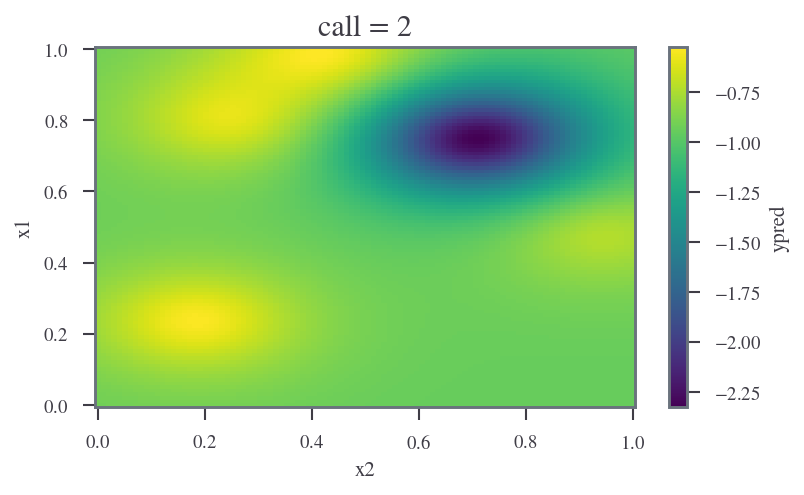

In [8]:
ds.ypred.isel(call=1).plot()

In [9]:
from sithom.plot import feature_grid

In [14]:
ds.ypred[:] = -ds.ypred[:]

In [17]:
ds["ystd"] = np.sqrt(ds.yvar)

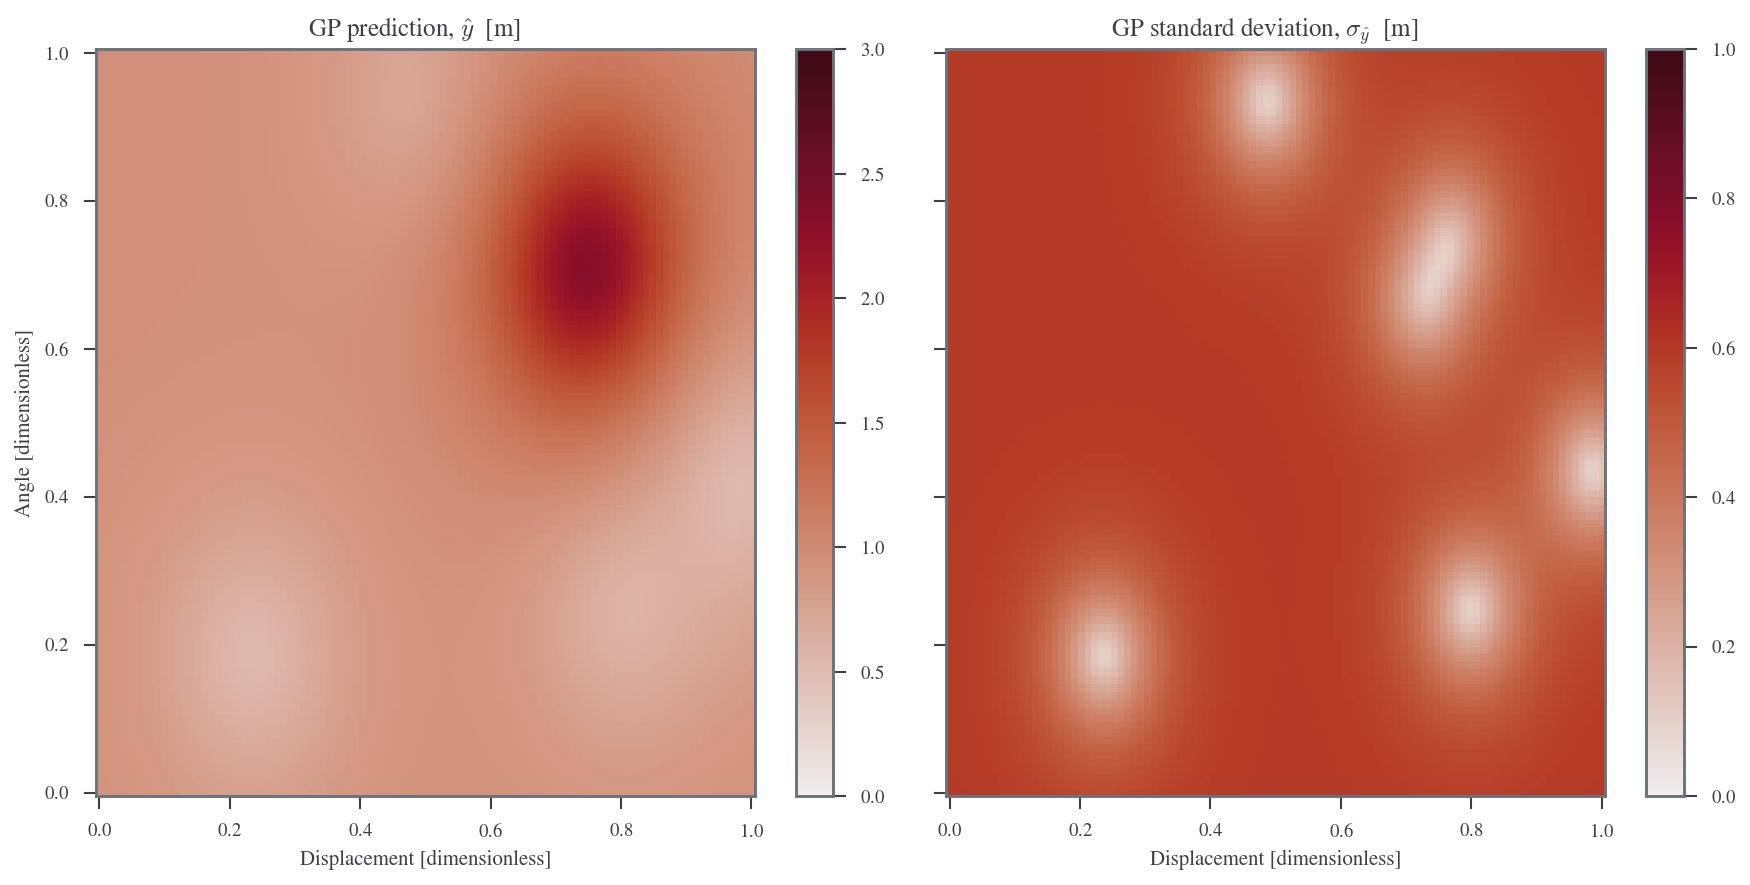

In [31]:
fig, axs = feature_grid(
    ds.isel(call=1),
    [["ypred", "ystd"]],
    [["m", "m"]],
    [["GP prediction, $\hat{y}$", "GP standard deviation, $\sigma_{\hat{y}}$"]],
    [[[0, 3, "cmo.amp"], [0, 1, "cmo.amp"]]],
    ["", ""],
    xy=(("x1", "Displacement", "dimensionless"), ("x2", "Angle", "dimensionless")),
)